In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import os
import pickle
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score

from scipy.stats import pointbiserialr, chi2_contingency

In [62]:
ATT_INT = ["Administrative", "Informational", "ProductRelated"]
ATT_INT_CATEGORY = ["OperatingSystems", "Browser", "Region", "TrafficType"]
ATT_FLOAT = [
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
]
ATT_STRING = ["Month", "VisitorType"]
ATT_BOOL = ["Weekend", "Revenue"]
ATT_BOOL_NO_TARGET = ["Weekend"]

TARGET = "Revenue"

RANDOM_STATES = [0, 1, 5, 7, 13, 23, 29, 32, 37, 42]

SCALERS = [None, MinMaxScaler, StandardScaler, RobustScaler]

In [63]:
df = pd.read_csv("dataset.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Overall Revenue

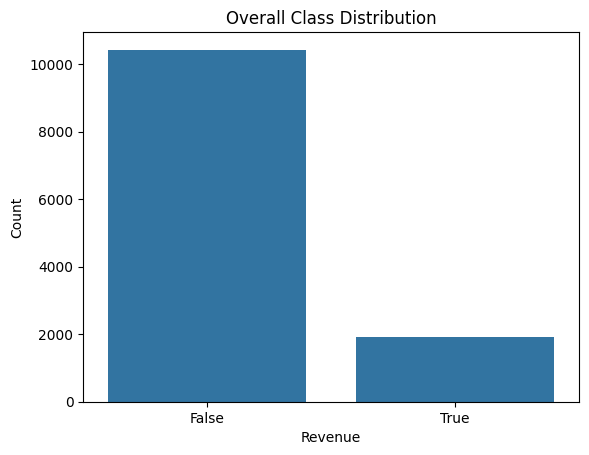

In [64]:
# Count the number of occurrences of each class
df_copy = df.copy()
class_counts = df_copy[TARGET].value_counts()

# Create a bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)

# Set the labels and title
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Overall Class Distribution")

plt.savefig("plots/overall_class_distribution.png", dpi=300)
# Show the plot
plt.show()

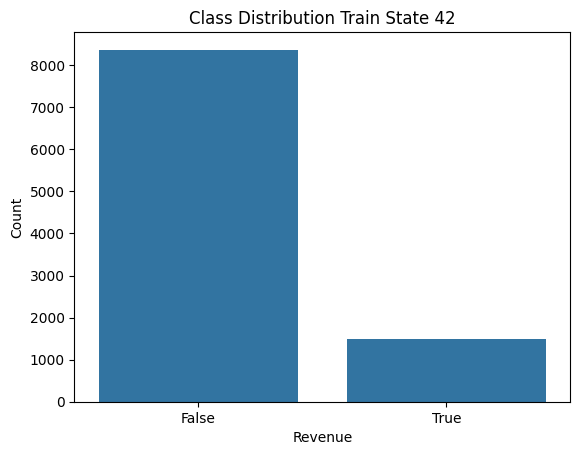

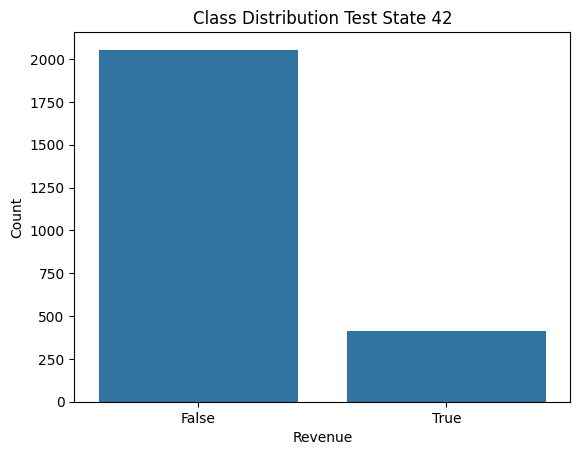

In [65]:
df_copy = df.copy()

_, _, y_train, y_test = train_test_split(
    df_copy.drop(TARGET, axis=1), df_copy[TARGET], test_size=0.2, random_state=42
)
trues_train = y_train[y_train == True].count()
false_train = y_train[y_train == False].count()
trues_test = y_test[y_test == True].count()
false_test = y_test[y_test == False].count()

# Count the number of occurrences of each class
class_counts = [false_train, trues_train]

# Create a bar plot
sns.barplot(x=[False, True], y=class_counts)

# Set the labels and title
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Class Distribution Train State 42")

plt.savefig("plots/class_distribution_train_42.png", dpi=300)

# Show the plot
plt.show()

# Count the number of occurrences of each class
class_counts_test = [false_test, trues_test]

# Create a bar plot
sns.barplot(x=[False, True], y=class_counts_test)

# Set the labels and title
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Class Distribution Test State 42")

plt.savefig("plots/class_distribution_test_42.png", dpi=300)
# Show the plot
plt.show()

Train:  1523.2 8340.8
Test:  384.8 2081.2


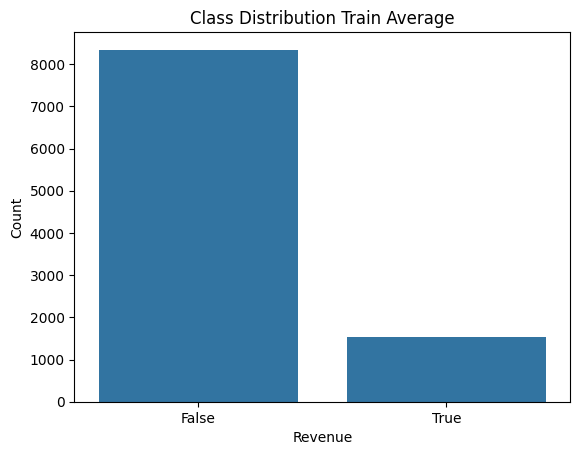

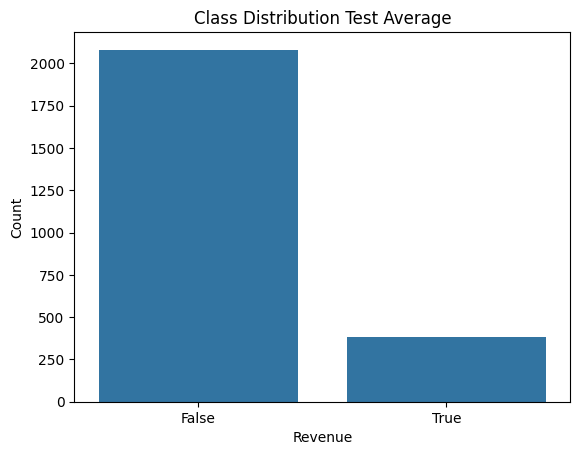

In [66]:
trues_train = 0
false_train = 0
trues_test = 0
false_test = 0

for state in RANDOM_STATES:
    df_copy = df.copy()

    _, _, y_train, y_test = train_test_split(
        df_copy.drop(TARGET, axis=1), df_copy[TARGET], test_size=0.2, random_state=state
    )

    trues_train += y_train[y_train == True].count()
    false_train += y_train[y_train == False].count()
    trues_test += y_test[y_test == True].count()
    false_test += y_test[y_test == False].count()

trues_train /= len(RANDOM_STATES)
false_train /= len(RANDOM_STATES)
trues_test /= len(RANDOM_STATES)
false_test /= len(RANDOM_STATES)

print("Train: ", trues_train, false_train)
print("Test: ", trues_test, false_test)

# Count the number of occurrences of each class
class_counts = [false_train, trues_train]

# Create a bar plot
sns.barplot(x=[False, True], y=class_counts)

# Set the labels and title
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Class Distribution Train Average")

plt.savefig("plots/class_distribution_train_average.png", dpi=300)

# Show the plot
plt.show()

# Count the number of occurrences of each class
class_counts_test = [false_test, trues_test]

# Create a bar plot
sns.barplot(x=[False, True], y=class_counts_test)

# Set the labels and title
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Class Distribution Test Average")

plt.savefig("plots/class_distribution_test_average.png", dpi=300)
# Show the plot
plt.show()

## Analiza date 2

### 1.a numerice

10


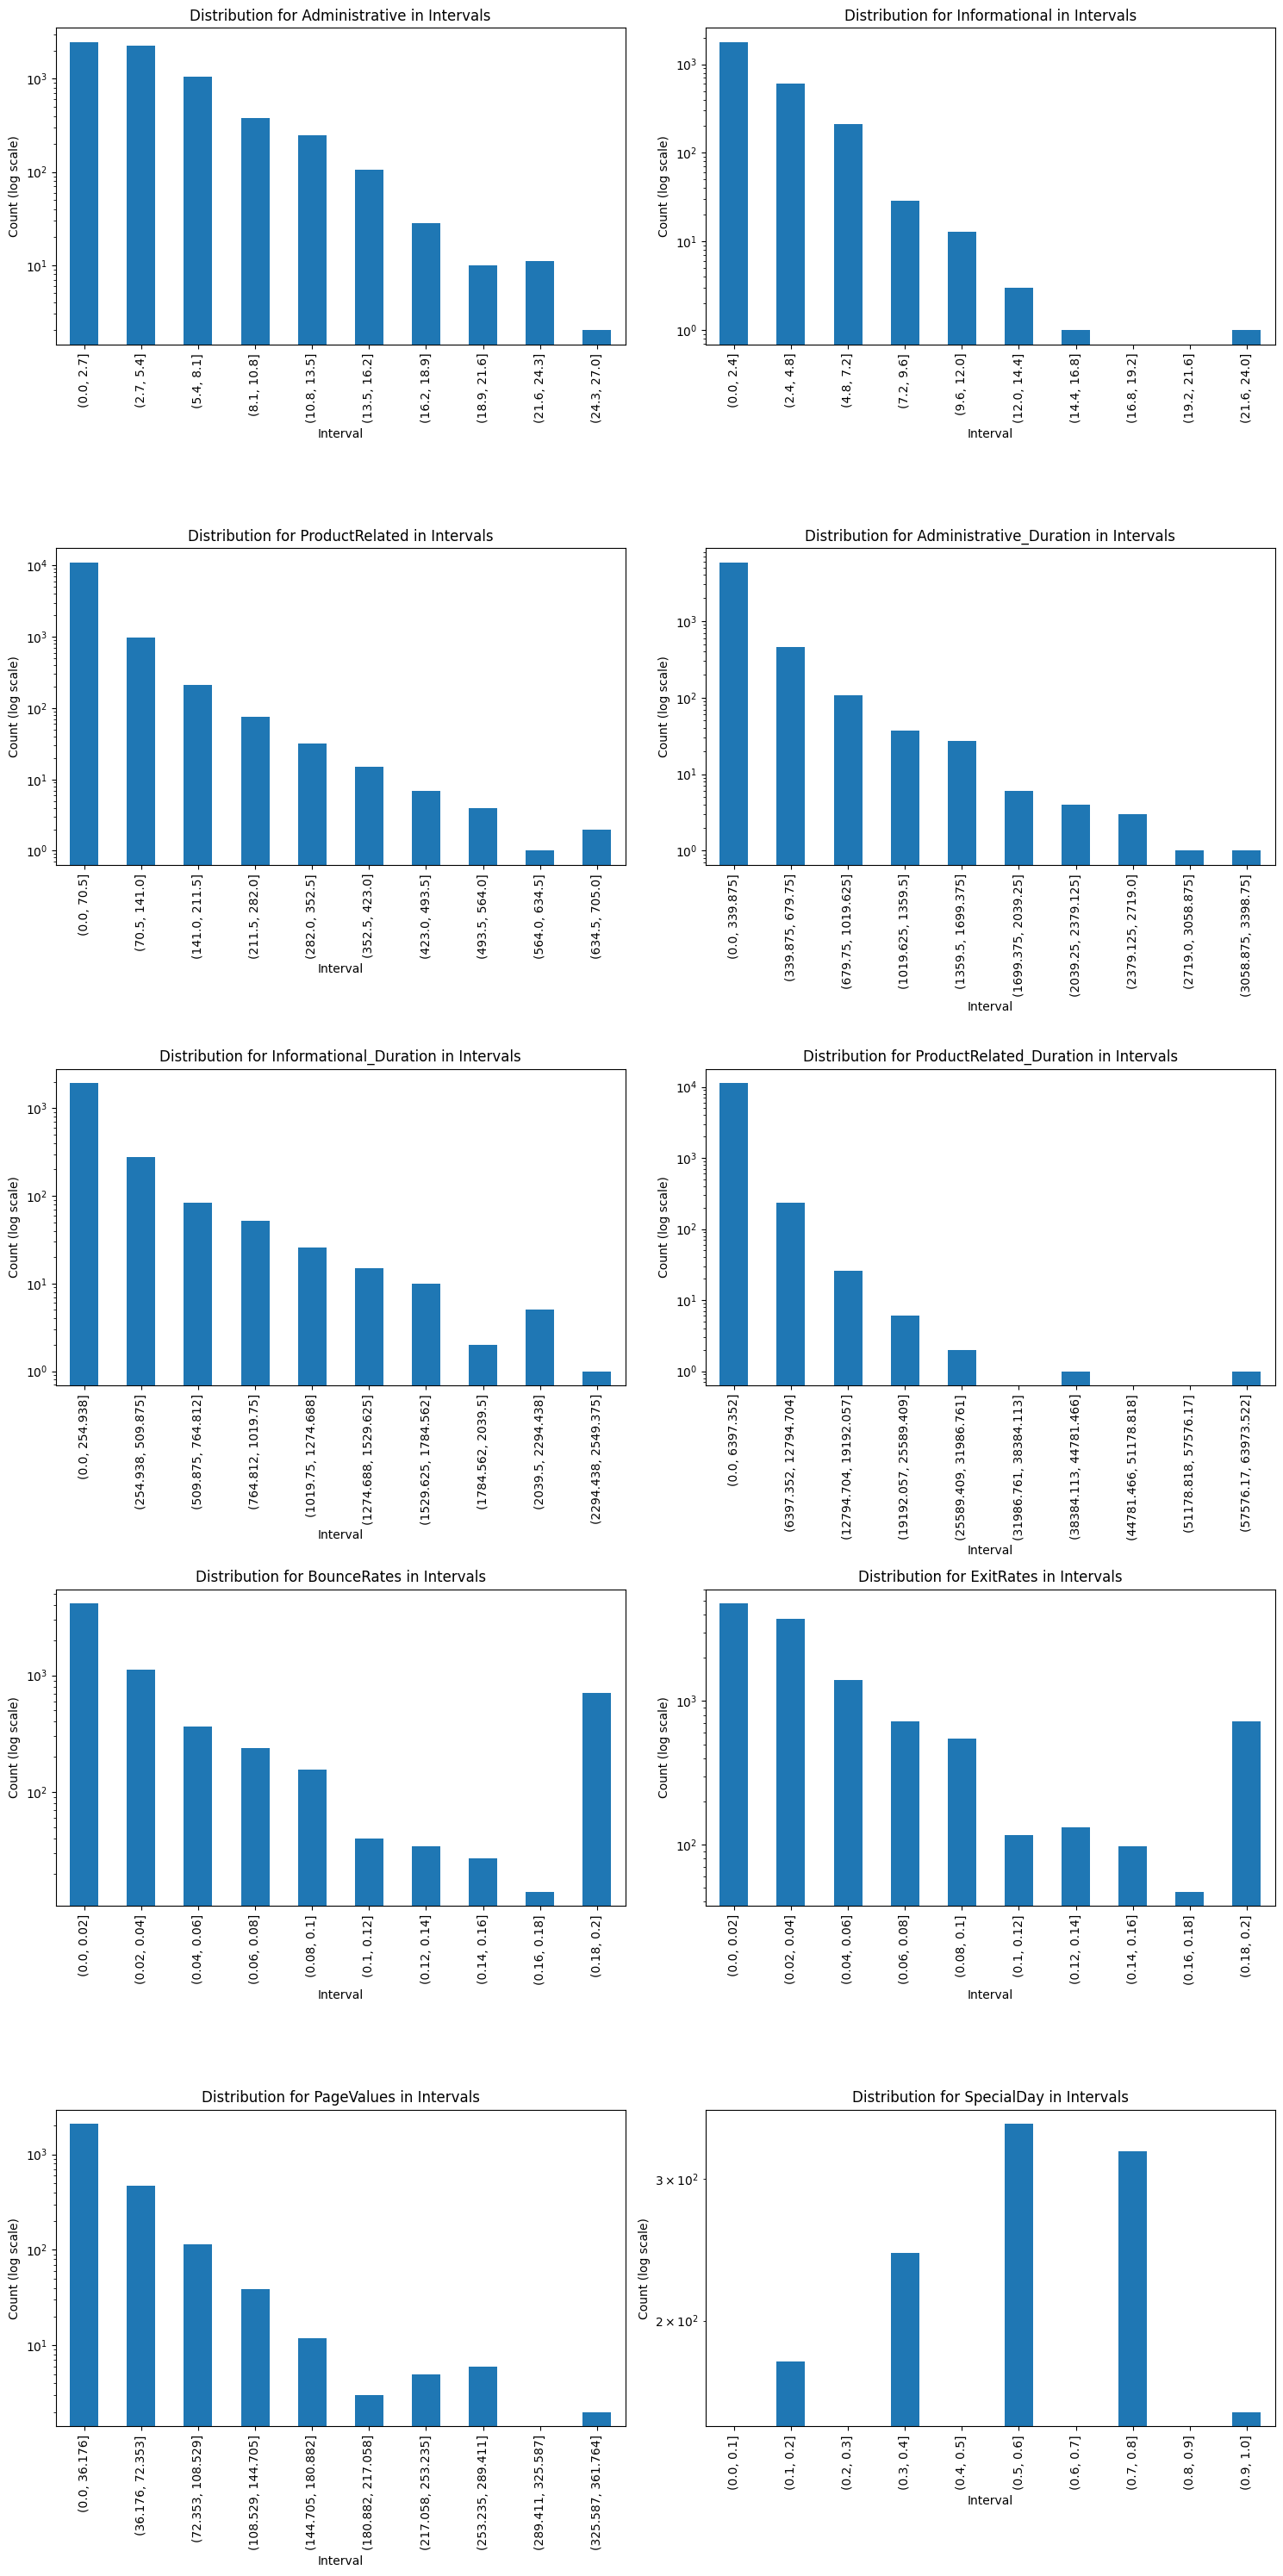

In [67]:
df_copy = df.copy()
fig, axes = plt.subplots(len(ATT_INT + ATT_FLOAT) // 2, 2, figsize=(15, 30))
print(len(ATT_INT + ATT_FLOAT))
for i, x in enumerate(ATT_INT + ATT_FLOAT):
    # Calculate the percentiles for each attribute
    x_min = df_copy[x].min()
    x_max = df_copy[x].max()
    intervals = np.linspace(x_min, x_max, 11)

    # Create a bar chart
    df_copy[x + "_interval"] = pd.cut(df_copy[x], intervals)
    interval_counts = df_copy[x + "_interval"].value_counts().sort_index()

    # Convert Interval objects to their midpoints
    midpoints = interval_counts.index.map(lambda x: x.mid)
    # Plot the values for each interval with logarithmic count (base 2)
    # axes[i//2, i%2].bar(midpoints, interval_counts.values, log=True)
    interval_counts.plot(kind="bar", logy=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xlabel("Interval")
    axes[i // 2, i % 2].set_ylabel("Count (log scale)")
    axes[i // 2, i % 2].set_title(f"Distribution for {x} in Intervals")

plt.tight_layout()
plt.savefig("plots/distribution_intervals_numerical.png", dpi=300)
plt.show()

### 1.b categorice

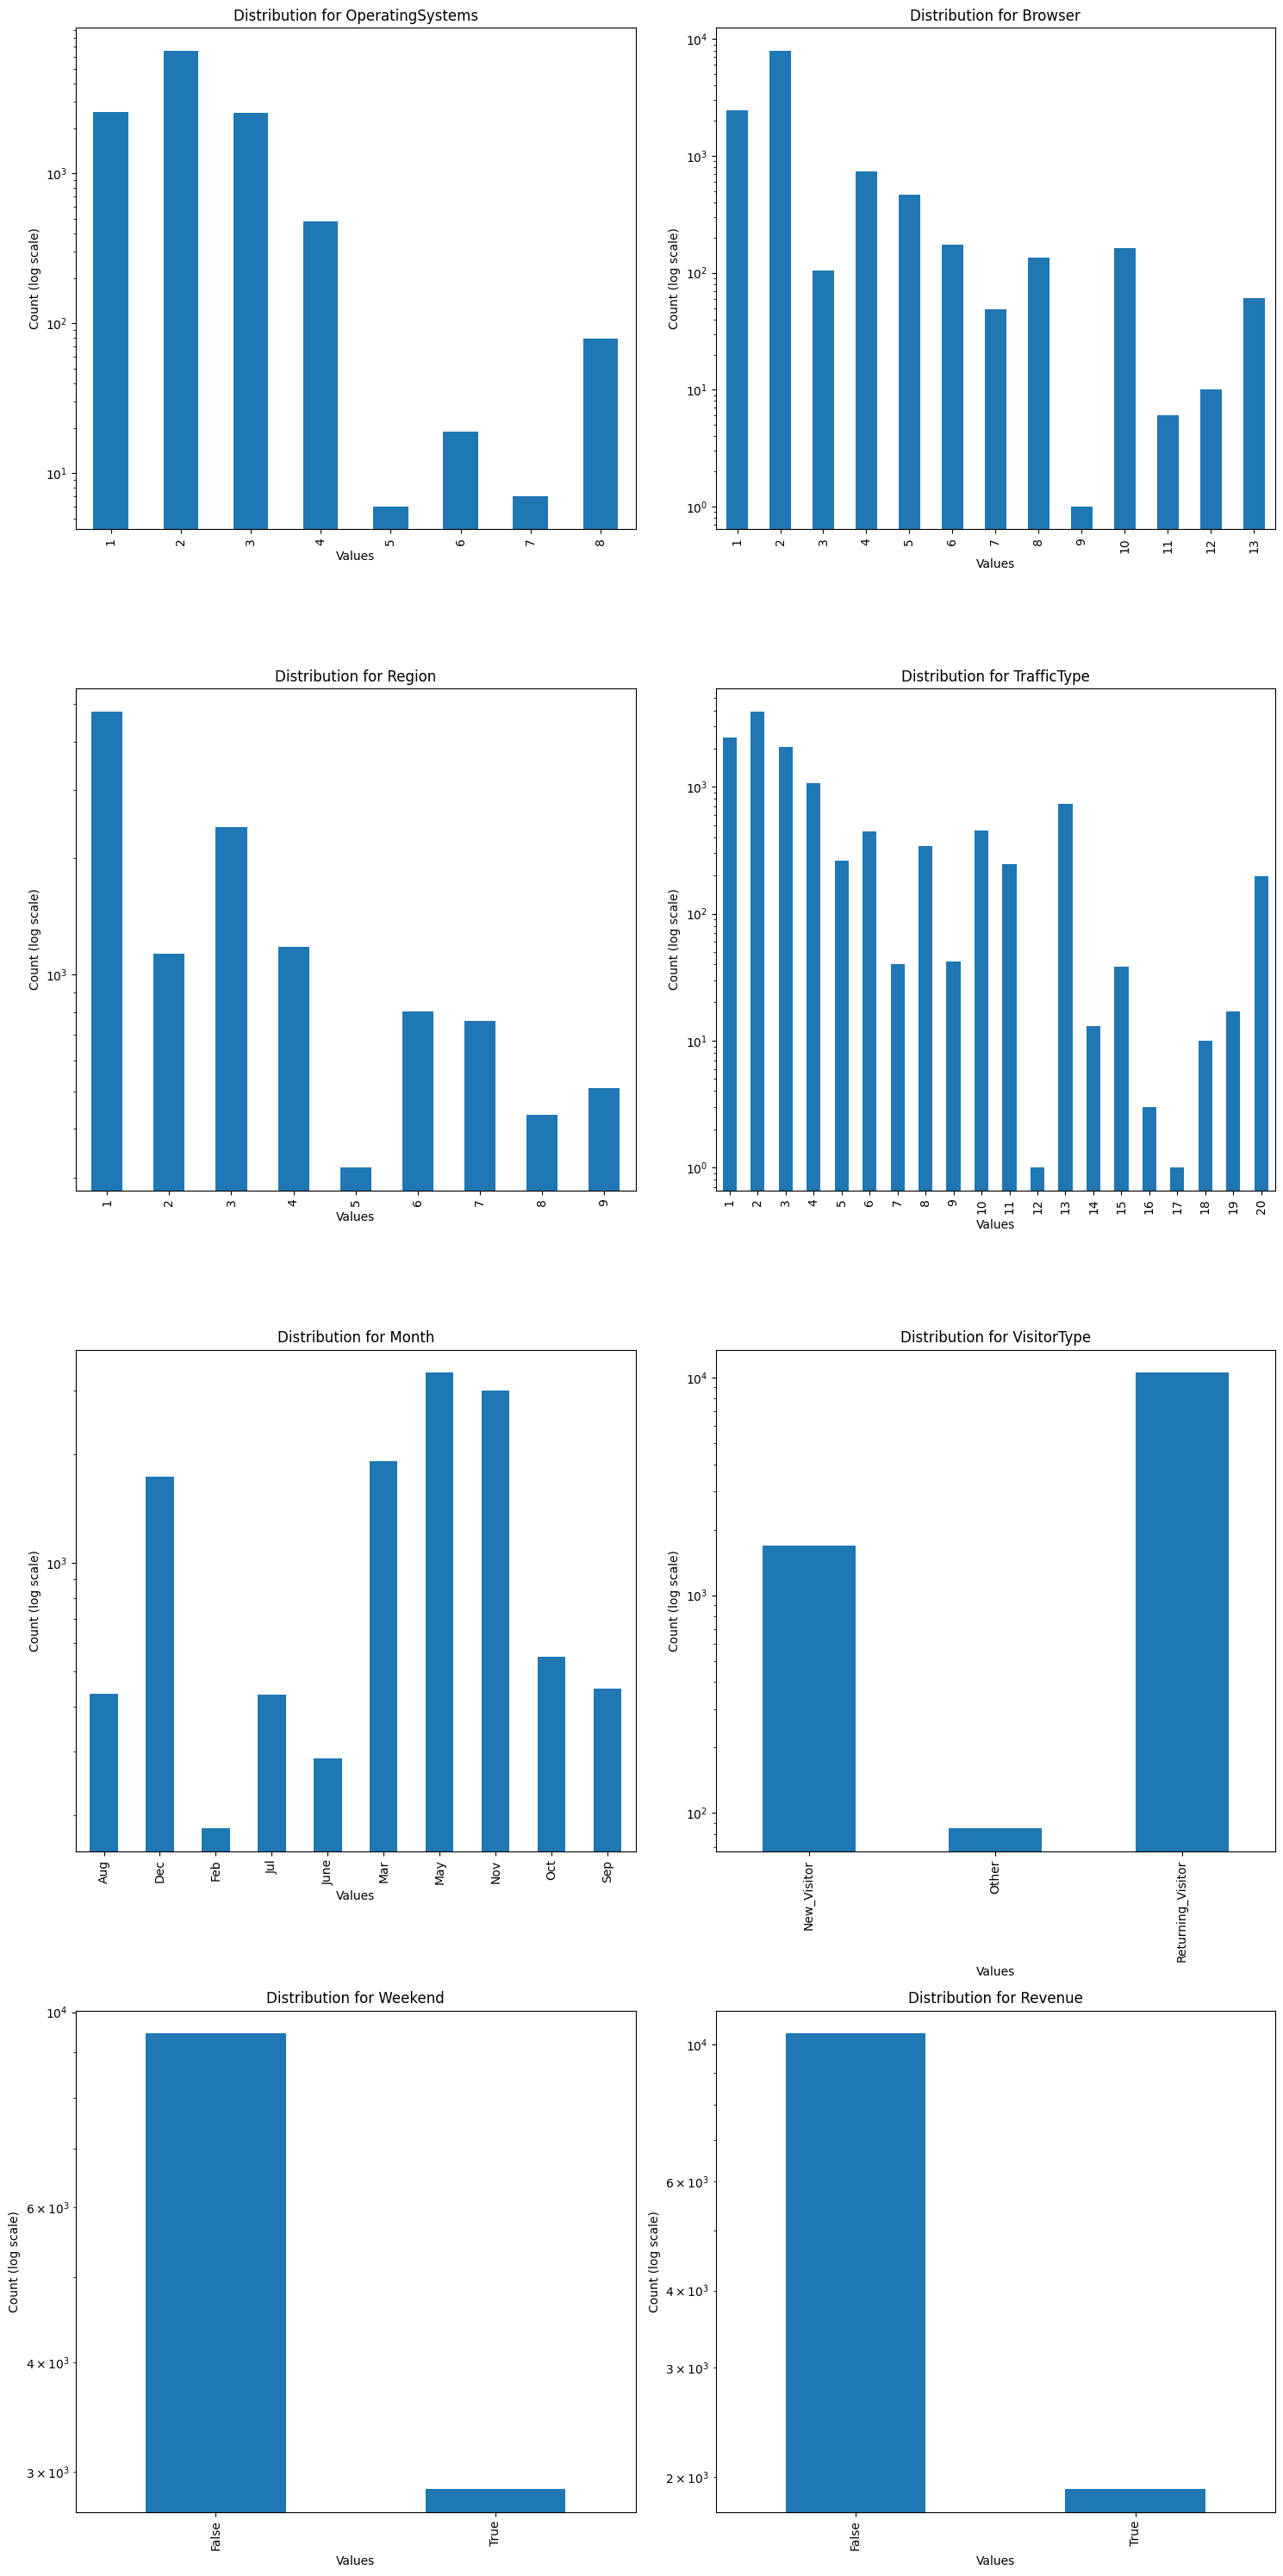

In [68]:
df_copy = df.copy()
fig, axes = plt.subplots(
    len(ATT_INT_CATEGORY + ATT_STRING + ATT_BOOL) // 2, 2, figsize=(15, 30)
)

for i, x in enumerate(ATT_INT_CATEGORY + ATT_STRING + ATT_BOOL):
    # Create a bar chart
    interval_counts = df_copy[x].value_counts().sort_index()

    # Plot the values for each interval with logarithmic count (base 2)
    interval_counts.plot(kind="bar", ax=axes[i // 2, i % 2], logy=True)
    axes[i // 2, i % 2].set_xlabel("Values")
    axes[i // 2, i % 2].set_ylabel("Count (log scale)")
    axes[i // 2, i % 2].set_title(f"Distribution for {x}")

plt.tight_layout()
plt.savefig("plots/distribution_categorical.png", dpi=300, bbox_inches="tight")
plt.show()

### 2 numerice


In [69]:
# Calculate Point-Biserial Correlation for each numerical attribute

df_copy = df.copy()
correlation_p_df = pd.DataFrame(columns=["Attribute", "Correlation", "P-Value"])
correlation_p_df_category = pd.DataFrame(
    columns=["Attribute", "Correlation", "P-Value"]
)

for attribute in ATT_INT + ATT_FLOAT:
    correlation, p_value = pointbiserialr(df_copy[attribute], df_copy[TARGET])
    correlation_p_df.loc[len(correlation_p_df)] = [attribute, correlation, p_value]


for attribute in ATT_BOOL + ATT_INT_CATEGORY + ATT_STRING:
    if attribute == TARGET:
        continue
    # Create a contingency table
    contingency = pd.crosstab(df_copy[attribute], df_copy[TARGET])

    # Calculate the Chi-Square statistic and the associated p-value
    correlation, p_value, dof, expected = chi2_contingency(contingency)

    correlation_p_df_category.loc[len(correlation_p_df_category)] = [
        attribute,
        correlation,
        p_value,
    ]

# Print the correlation and p-value dictionaries
print("Point Biserial Correlation")
print(correlation_p_df)


print("\nChi-Square Correlation")
print(correlation_p_df_category)

Point Biserial Correlation
                 Attribute  Correlation        P-Value
0           Administrative     0.138917   3.519760e-54
1            Informational     0.095200   3.174034e-26
2           ProductRelated     0.158538   3.241187e-70
3  Administrative_Duration     0.093587   2.146514e-25
4   Informational_Duration     0.070345   5.282871e-15
5  ProductRelated_Duration     0.152373   6.115338e-65
6              BounceRates    -0.150673   1.594198e-63
7                ExitRates    -0.207071  1.662654e-119
8               PageValues     0.492569   0.000000e+00
9               SpecialDay    -0.082305   5.498934e-20

Chi-Square Correlation
          Attribute  Correlation       P-Value
0           Weekend    10.390978  1.266325e-03
1  OperatingSystems    75.027056  1.416094e-13
2           Browser    27.715299  6.087543e-03
3            Region     9.252751  3.214250e-01
4       TrafficType   373.145565  1.652735e-67
5             Month   384.934762  2.238786e-77
6       Visitor

In [70]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()

plt.close('all')
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode labels for each column in the dataframe
for column in df_copy.columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

matrix = df_copy.corr()

plt.figure(figsize=(20, 20))
# Plotting correlation matrix with 2 decimal places
, .heatmap(matrix.round(2), cmap="Greens", annot=True)

# Save the figure
plt.savefig('plots/correlation_matrix.png', dpi=300, bbox_inches='tight')


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2902539602.py, line 16)

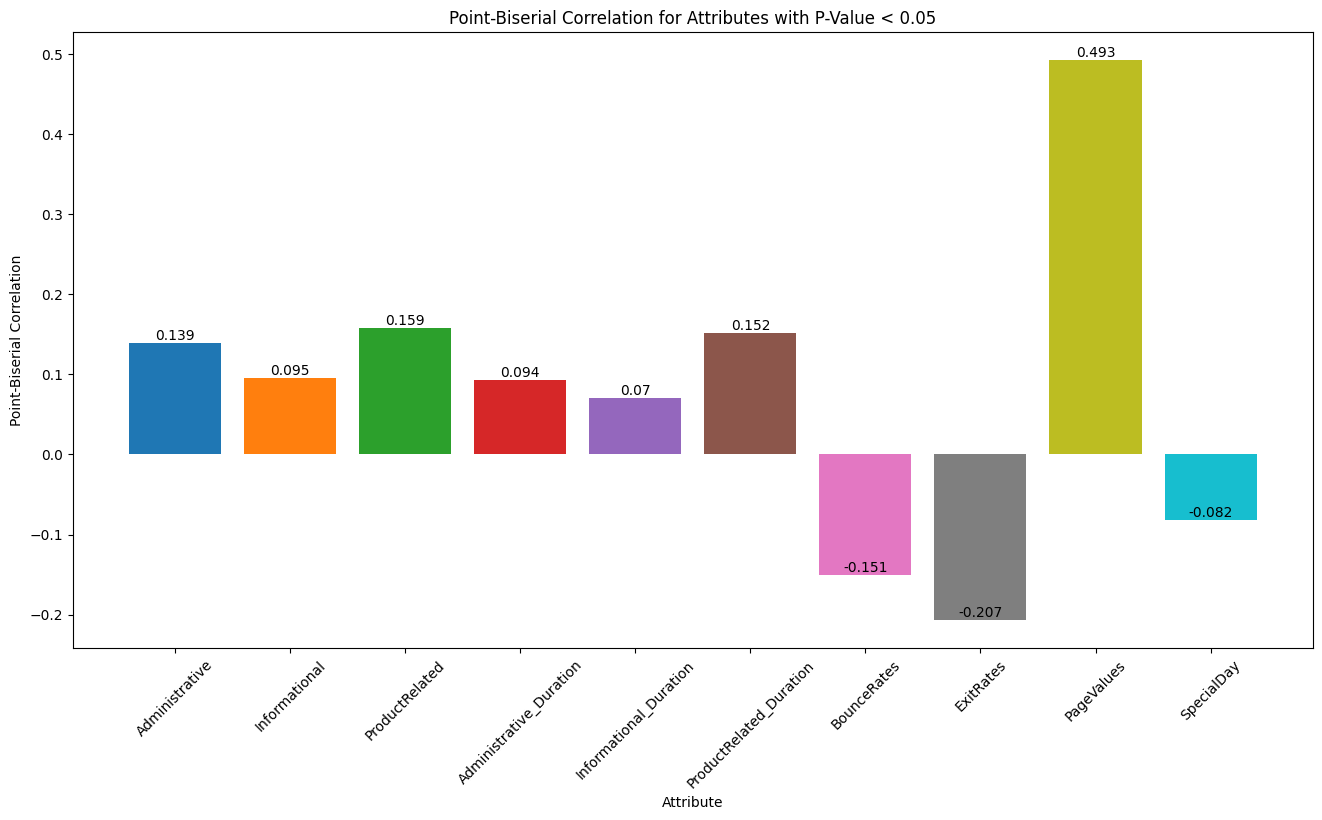

In [ ]:
# Filter the attributes with p-value lower than 0.05
filtered_attributes = correlation_p_df[correlation_p_df["P-Value"] < 0.05]["Attribute"]

plt.close()
plt.figure(figsize=(16, 8))
# Create a bar chart plot for each filtered attribute
for attribute in filtered_attributes:
    # Get the correlation value for the attribute
    correlation = correlation_p_df.loc[
        correlation_p_df["Attribute"] == attribute, "Correlation"
    ].values[0]

    # Create a bar plot
    plt.bar(attribute, correlation)

    # Add the value at the top of each bar
    plt.text(
        attribute, correlation, str(round(correlation, 3)), ha="center", va="bottom"
    )

# Set the labels and title
plt.xlabel("Attribute")
plt.xticks(rotation=45)
plt.ylabel("Point-Biserial Correlation")
plt.title("Point-Biserial Correlation for Attributes with P-Value < 0.05")

plt.savefig("plots/correlation_point_biserial.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

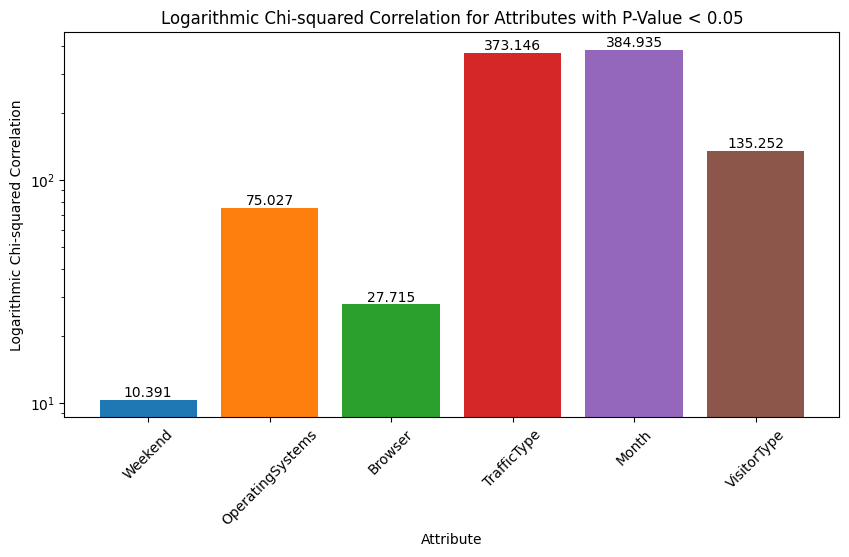

In [ ]:
filtered_attributes = correlation_p_df_category[
    correlation_p_df_category["P-Value"] < 0.05
]["Attribute"]

plt.close()
plt.figure(figsize=(10, 5))
# Create a bar chart plot for each filtered attribute
for attribute in filtered_attributes:
    # Get the correlation value for the attribute
    correlation = correlation_p_df_category.loc[
        correlation_p_df_category["Attribute"] == attribute, "Correlation"
    ].values[0]

    # Create a bar plot
    plt.bar(attribute, correlation)

    # Add the value at the top of each bar
    plt.text(
        attribute, correlation, str(round(correlation, 3)), ha="center", va="bottom"
    )

# Set the labels and title
plt.xlabel("Attribute")
plt.xticks(rotation=45)
plt.ylabel("Logarithmic Chi-squared Correlation")
plt.title("Logarithmic Chi-squared Correlation for Attributes with P-Value < 0.05")
plt.yscale("log")

plt.savefig("plots/correlation_chi_squared.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()